# Content-based similarities
This notebook shows the process used to calculate similarities among the informative videos maintained by the +TV4E platform. In addition, a 2D-graph shows how these items are arranged in the vector space. Thi script must be run in an offline mode to calculate the similarities. 

Library requirements:
* Pandas
* NumPy
* Scikit-learn 
* NLTK (w/ portuguese stop words)
* Seaborn 
* Matplotlib

In [1]:
# for Python 2: use print only as a function
from __future__ import print_function

### Part 1 - Examine the data

In [2]:
# read CSV using a relative path
import pandas as pd
import requests
URL='http://api_mysql.tv4e.pt/api/recommendations/videos'
data= requests.get(URL)
df_videos=pd.DataFrame(data.json())

In [3]:
# examine the shape of the dataframe
df_videos.shape

(141, 7)

In [4]:
# examine the first rows
df_videos.head()

,video_asgie_id,video_asgie_title_pt,video_date_creation,video_desc,video_id,video_location,video_title
0,1,Saúde e Bem-Estar,2017-09-26 15:36:20,Mais pessoas recorrem aos centros de saúde par...,4051,,Deixar de fumar
1,1,Saúde e Bem-Estar,2017-09-26 15:38:36,Quase sete mil unidades de medicamentos apreen...,4053,,Medicamentos falsificados
2,1,Saúde e Bem-Estar,2017-09-26 15:40:12,Ministro da Saúde participa no encontro em Coi...,4054,,Conferência Mundial de Saúde Urbana
3,1,Saúde e Bem-Estar,2017-09-26 15:40:19,Rastreio visa despiste da ambliopia em criança...,4055,,CHTS | Saúde visual infantil
4,1,Saúde e Bem-Estar,2017-09-26 15:40:52,Implementação do sistema informático concluída...,4060,,VIH |SI.VIDA


In [5]:
# examine the class distribution and check percentages of ASGIE types
asgies = df_videos.video_asgie_title_pt.value_counts().to_frame()
asgies['percents'] = ""
asgies['percents'] = (asgies.video_asgie_title_pt/df_videos.shape[0])*100
asgies

,video_asgie_title_pt,percents
Saúde e Bem-Estar,86,60.992908
Cultura,30,21.276596
Finanças,25,17.730496


In [6]:
# show all lines in ASGIE 'Finanças'
df_videos_financas = df_videos[(df_videos.video_asgie_title_pt=='Finanças')]
df_videos_financas

,video_asgie_id,video_asgie_title_pt,video_date_creation,video_desc,video_id,video_location,video_title
86,3,Finanças,2017-09-26 15:21:16,Seja qual for o cenário para os escalões do IR...,4049,,As “habilidadezinhas” do Governo para descer o...
87,3,Finanças,2017-10-04 12:11:41,A Comissão Europeia quer o IVA a funcionar num...,4162,,Bruxelas quer acabar com a isenção de IVA nas ...
88,3,Finanças,2017-10-05 22:11:44,A troca automática de informações que agora se...,4169,,Dados bancários: o que fará o Fisco com tanta ...
89,3,Finanças,2017-10-06 14:14:48,"À medida que o tempo passa, o Governo vai cede...",4174,,Redução de IRS chega a cada vez mais gente
90,3,Finanças,2017-10-08 22:18:42,O antigo ministro das Finanças António Bagão F...,4177,,Bagão Félix defende reforma fiscal por sistema...
91,3,Finanças,2017-10-11 09:11:42,O Correio da Manhã publica hoje os escalões de...,4220,,"Novos escalões de IRS: 1,5 milhões de contribu..."
92,3,Finanças,2017-10-11 22:11:59,À luz da última proposta que o Governo colocou...,4225,,Descida do IRS abrange salários até 3.200 euro...
93,3,Finanças,2017-10-12 16:17:34,O Governo começou por só prometer a descida do...,4230,,O seu IRS baixa em 2018?
94,3,Finanças,2017-10-12 19:16:17,O Governo pretende baixar o IVA aplicável aos ...,4232,,Instrumentos musicais vão pagar menos IVA
95,3,Finanças,2017-10-12 23:11:41,O Fisco vai deixar de poder avançar com penhor...,4233,,Fisco impedido de penhorar recibos verdes de b...


### Part 2 - Vectorize text contents

In [7]:
# import and retrieve portuguese stop words
# stop words are not considered as token as usually they carry no meaning (!)
from nltk.corpus import stopwords
portuguese_stop_words = stopwords.words('portuguese')
portuguese_stop_words

['de',
 'a',
 'o',
 'que',
 'e',
 'do',
 'da',
 'em',
 'um',
 'para',
 'com',
 'não',
 'uma',
 'os',
 'no',
 'se',
 'na',
 'por',
 'mais',
 'as',
 'dos',
 'como',
 'mas',
 'ao',
 'ele',
 'das',
 'à',
 'seu',
 'sua',
 'ou',
 'quando',
 'muito',
 'nos',
 'já',
 'eu',
 'também',
 'só',
 'pelo',
 'pela',
 'até',
 'isso',
 'ela',
 'entre',
 'depois',
 'sem',
 'mesmo',
 'aos',
 'seus',
 'quem',
 'nas',
 'me',
 'esse',
 'eles',
 'você',
 'essa',
 'num',
 'nem',
 'suas',
 'meu',
 'às',
 'minha',
 'numa',
 'pelos',
 'elas',
 'qual',
 'nós',
 'lhe',
 'deles',
 'essas',
 'esses',
 'pelas',
 'este',
 'dele',
 'tu',
 'te',
 'vocês',
 'vos',
 'lhes',
 'meus',
 'minhas',
 'teu',
 'tua',
 'teus',
 'tuas',
 'nosso',
 'nossa',
 'nossos',
 'nossas',
 'dela',
 'delas',
 'esta',
 'estes',
 'estas',
 'aquele',
 'aquela',
 'aqueles',
 'aquelas',
 'isto',
 'aquilo',
 'estou',
 'está',
 'estamos',
 'estão',
 'estive',
 'esteve',
 'estivemos',
 'estiveram',
 'estava',
 'estávamos',
 'estavam',
 'estivera',
 'es

In [8]:
# import and instantiate TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=2, max_df=0.5, stop_words=portuguese_stop_words)

In [9]:
# fit (train) the vectorizer with the corpus from video text contents
tfidf_matrix = tfidf.fit_transform(df_videos.video_desc)
tfidf_matrix

<141x6432 sparse matrix of type '<class 'numpy.float64'>'
	with 23509 stored elements in Compressed Sparse Row format>

In [10]:
# show the size of the vocabulary
len(tfidf.vocabulary_)

6432

In [11]:
# show the vocabulary
tfidf.get_feature_names()

['000',
 '018',
 '018 2017',
 '06',
 '06 junho',
 '09',
 '10',
 '10 anos',
 '10 horas',
 '10 milhões',
 '10 outubro',
 '100',
 '100 sessão',
 '102',
 '108',
 '108 mil',
 '10h30',
 '11',
 '11 outubro',
 '113',
 '113 2011',
 '12',
 '12 outubro',
 '120',
 '120 médicos',
 '127',
 '13',
 '13 outubro',
 '14',
 '14 mil',
 '140',
 '140 2016',
 '15',
 '150',
 '1500',
 '1500 euros',
 '154',
 '154 administração',
 '154 profissionais',
 '154 vagas',
 '16',
 '16 conferência',
 '16 milhões',
 '16 outubro',
 '17',
 '17 comunidades',
 '17 outubro',
 '170',
 '170 milhões',
 '18',
 '18 64',
 '19',
 '19 candidaturas',
 '1945',
 '195',
 '195 2017',
 '1981',
 '1990',
 '1990 algarve',
 '20',
 '20 30',
 '20 mil',
 '20 mulheres',
 '20 outubro',
 '20 startups',
 '200',
 '200 milhões',
 '2004',
 '2005',
 '2009',
 '2011',
 '2011 29',
 '2012',
 '2013',
 '2014',
 '2014 arslvt',
 '2015',
 '2015 140',
 '2015 lone',
 '2015 mobilizou',
 '2015 projeto',
 '2016',
 '2016 90',
 '2016 ano',
 '2016 mercado',
 '2016 nesta',


In [12]:
# retrieve tokens from the first video
tfidf_matrix[0].toarray()

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [13]:
# retrieve tokens from the first video
tfidf.inverse_transform(tfidf_matrix[0])

[array(['pessoas', 'centros', 'deixar', 'tabaco', 'número', 'cuidados',
        'primários', 'estado', 'aumentar', 'primeiros', 'seis', 'meses',
        'ano', 'administração', 'regional', 'lisboa', 'vale', 'tejo',
        'consultas', 'apoio', 'intensivo', 'destas', 'cerca', '35',
        'primeiras', 'dados', 'divulgados', 'dia', 'europeu', 'ex',
        'assinalado', '26', 'setembro', 'tanto', 'global', 'arslvt',
        'crescer', 'últimos', 'anos', 'todo', '2016', 'sido', 'corresponde',
        'aumento', '12', 'relativamente', '2015', 'subiu', 'quase',
        'atualmente', 'todos', 'agrupamentos', 'têm', 'tendo', 'cobertura',
        '100', 'existiam', '24', 'locais', 'cresceu', '32', 'além',
        'disponibilização', 'aces', 'outras', 'iniciativas', 'prevenção',
        'tabagismo', 'exposição', 'fumo', 'ambiental', 'total', '127',
        'ações', 'chegaram', 'maioria', 'jovens', 'idade', 'portugal',
        'morrem', '11', 'mil', 'doenças', 'provocadas', 'consumo', 'quais',

### Part 3  - Finding similarities

In [14]:
# calculate similarities in the tfidf_matrix (to what extent rows are similar to another) 
from sklearn.metrics.pairwise import linear_kernel
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)
# note: diagonal has the similarity of an item with itself
cosine_similarities

array([[ 1.        ,  0.06292482,  0.05379193, ...,  0.00567889,
         0.01980292,  0.00228928],
       [ 0.06292482,  1.        ,  0.04792329, ...,  0.0119067 ,
         0.03427486,  0.0149942 ],
       [ 0.05379193,  0.04792329,  1.        , ...,  0.02442546,
         0.01776278,  0.00381156],
       ..., 
       [ 0.00567889,  0.0119067 ,  0.02442546, ...,  1.        ,
         0.01930323,  0.10157756],
       [ 0.01980292,  0.03427486,  0.01776278, ...,  0.01930323,
         1.        ,  0.01193871],
       [ 0.00228928,  0.0149942 ,  0.00381156, ...,  0.10157756,
         0.01193871,  1.        ]])

In [15]:
cosine_similarities.shape

(141, 141)

In [16]:
 for i, row in df_videos.iterrows():
        similar_indices = cosine_similarities[i].argsort()[:-5:-1]
        similar_indices = similar_indices[1:]
        print(similar_indices)
        similar_items = [(cosine_similarities[i][j], df_videos.video_id[j]) for j in similar_indices]
        #print("Video ID = %s" % row['id'])
        #print("Similar items: %s" % similar_items)

[53 10  9]
[23 79 33]
[74 62 29]
[53 57 26]
[39 44 84]
[79 82  8]
[17 30 36]
[16 58 26]
[56  4  0]
[10 11 37]
[ 9 11 37]
[ 9 10 38]
[34 72 84]
[ 66  49 115]
[15 45 49]
[14 28 44]
[ 7 26 58]
[ 6 30 36]
[87 54 47]
[43 84 72]
[21 17  6]
[52 39 20]
[ 7 45 85]
[71  1 33]
[34 70 72]
[ 1 29 51]
[70 16 58]
[24 70 84]
[15 61 56]
[ 2 62 69]
[17  6 15]
[32 56 49]
[31 56 49]
[ 1 34 23]
[24 12 72]
[24 41 81]
[ 6 17 82]
[ 9 10 68]
[73 26 11]
[ 4 52 21]
[42 45 14]
[81 83 85]
[40 45 59]
[19 84  4]
[ 4 84 15]
[40 42 14]
[47 54 18]
[47 54 18]
[80 72 24]
[14 15 28]
[81 30 78]
[79  1 23]
[21 39 82]
[ 3  0 56]
[46 47 62]
[82 37 44]
[28 53  0]
[64 52 44]
[26  7 16]
[69 42 21]
[ 0 73 33]
[63 28 15]
[74  2 54]
[61 28 29]
[57 58 26]
[ 68 105  84]
[13 49 63]
[111  57 138]
[37 24 34]
[59 37  2]
[26 24 58]
[23 79  1]
[84 24 34]
[38 37 11]
[62  2 69]
[83 37 57]
[ 52   2 111]
[58 26 57]
[81 50 53]
[ 1 51 71]
[48 24 59]
[41 50 45]
[52 55 36]
[75 41 54]
[72  4 44]
[41 15 64]
[ 93 102  91]
[94 18 21]
[79 12 33]
[ 93 1

### Part 4 - Plot a 2D graph with the items 

In [17]:
# reduce dimensionality
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD()
# Fit and transform data to n_features-dimensional space
tfidf_matrix_reduced = svd.fit_transform(tfidf_matrix)
tfidf_matrix_reduced

array([[ 0.29388989, -0.09408636],
       [ 0.24718489,  0.02882473],
       [ 0.18906152, -0.0172005 ],
       [ 0.23954506, -0.14410117],
       [ 0.26789425, -0.16760683],
       [ 0.13112659, -0.01712617],
       [ 0.18755836, -0.06205283],
       [ 0.26202681, -0.12014136],
       [ 0.2082831 , -0.01023575],
       [ 0.24405662, -0.15893622],
       [ 0.24371727, -0.15949278],
       [ 0.25405634, -0.03820452],
       [ 0.16174262, -0.03356144],
       [ 0.13913722, -0.02200879],
       [ 0.27188099, -0.16146091],
       [ 0.34231144, -0.12490612],
       [ 0.25062157, -0.13198587],
       [ 0.22111565, -0.06897276],
       [ 0.18128313,  0.00959144],
       [ 0.19614322, -0.13865103],
       [ 0.14906561, -0.06482051],
       [ 0.29568045, -0.08018997],
       [ 0.14466642, -0.013596  ],
       [ 0.17614226, -0.04624041],
       [ 0.31822634, -0.14356262],
       [ 0.21635887,  0.00842573],
       [ 0.29108252, -0.19518974],
       [ 0.15295911, -0.05974962],
       [ 0.20999339,

In [18]:
# create a new column for the coordinates
df_videos['x_coordinate'] = range(0, len(tfidf_matrix_reduced))
df_videos['x_coordinate'] = df_videos.x_coordinate.apply(lambda index: tfidf_matrix_reduced[index,0 :1])
df_videos['y_coordinate'] = range(0, len(tfidf_matrix_reduced))
df_videos['y_coordinate'] = df_videos.y_coordinate.apply(lambda index: tfidf_matrix_reduced[index,1 :])
df_videos

,video_asgie_id,video_asgie_title_pt,video_date_creation,video_desc,video_id,video_location,video_title,x_coordinate,y_coordinate
0,1,Saúde e Bem-Estar,2017-09-26 15:36:20,Mais pessoas recorrem aos centros de saúde par...,4051,,Deixar de fumar,[0.293889891708],[-0.0940863616654]
1,1,Saúde e Bem-Estar,2017-09-26 15:38:36,Quase sete mil unidades de medicamentos apreen...,4053,,Medicamentos falsificados,[0.24718489436],[0.0288247250657]
2,1,Saúde e Bem-Estar,2017-09-26 15:40:12,Ministro da Saúde participa no encontro em Coi...,4054,,Conferência Mundial de Saúde Urbana,[0.189061518092],[-0.0172005045656]
3,1,Saúde e Bem-Estar,2017-09-26 15:40:19,Rastreio visa despiste da ambliopia em criança...,4055,,CHTS | Saúde visual infantil,[0.239545061085],[-0.144101172969]
4,1,Saúde e Bem-Estar,2017-09-26 15:40:52,Implementação do sistema informático concluída...,4060,,VIH |SI.VIDA,[0.267894249792],[-0.167606825208]
5,1,Saúde e Bem-Estar,2017-09-26 15:41:00,Cientistas portugueses descobrem mecanismo da ...,4061,,Doença de Parkinson,[0.131126591627],[-0.0171261663473]
6,1,Saúde e Bem-Estar,2017-09-27 07:57:37,DGS emite orientações para profissionais de sa...,4089,,Vacinação contra a gripe 2017/2018,[0.187558362747],[-0.0620528253261]
7,1,Saúde e Bem-Estar,2017-09-27 10:28:30,"Centro Hospitalar investe 5,4 M€ em eficiência...",4094,,Eficiência energética em Setúbal,[0.262026813782],[-0.120141357976]
8,1,Saúde e Bem-Estar,2017-09-27 14:22:41,Número de casos aumenta entre pessoas com mais...,4096,,Infeções por VIH na Europa,[0.208283095644],[-0.0102357501075]
9,1,Saúde e Bem-Estar,2017-09-27 16:29:06,Lisboa e Vale do Tejo contrata maior número de...,4098,,Mais médicos de família,[0.244056618097],[-0.158936217082]


In [19]:
# prepare markers (we know we have 7 ASGIE types, so we'll set 7 markers)
NUMBER_OF_ASGIE_TYPES = 7
n_asgie_title_pt = len(df_videos.video_asgie_title_pt.unique())
markers_choice_list = ['o', 's', '^', '.', 'v', '<', '>']
markers_list = [markers_choice_list[i % NUMBER_OF_ASGIE_TYPES] for i in range(n_asgie_title_pt)]

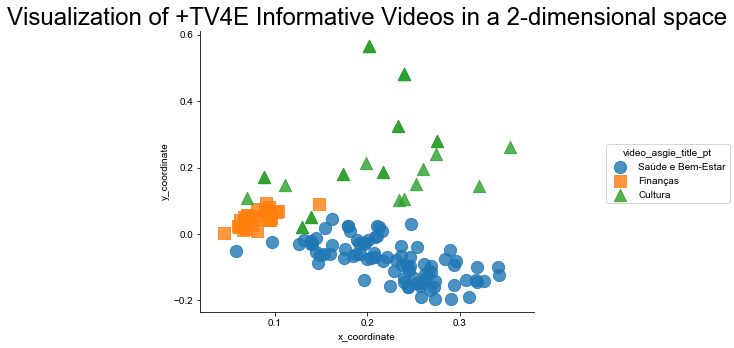

In [20]:
# plot!
import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot("x_coordinate", "y_coordinate", hue="video_asgie_title_pt", data=df_videos, fit_reg=False, markers=markers_list, scatter_kws={"s": 150})
# Adjust borders and add title
sns.set(font_scale=2)
plt.title('Visualization of +TV4E Informative Videos in a 2-dimensional space')
plt.subplots_adjust(right=0.80, top=0.90, left=0.12, bottom=0.12)
# Show plot
plt.show()